TRAINING: Linear regression to predict car prices

1. Install Kaggle

In [32]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


2. Download car dataset

In [33]:
#!kaggle datasets download -d CooperUnion/cardataset

3. Unzip the file cardataset.zip

In [34]:
#!unzip cardataset.zip

4. Import libraries to perform an exploratory data analysis.

In [35]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

5. Reading and preparing data

In [36]:
df = pd.read_csv('data.csv')
len(df)

11914

In [37]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [38]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


6. Target variable analysis, msrp (manufacture's seggested retail price) column contains the value that we want to predict.

/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

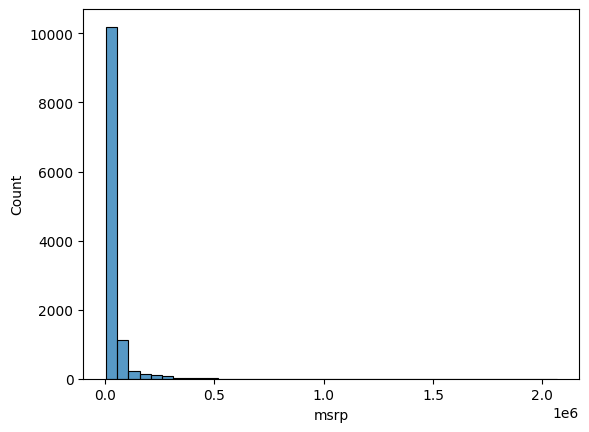

In [39]:
sns.histplot(df.msrp, bins = 40)

/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

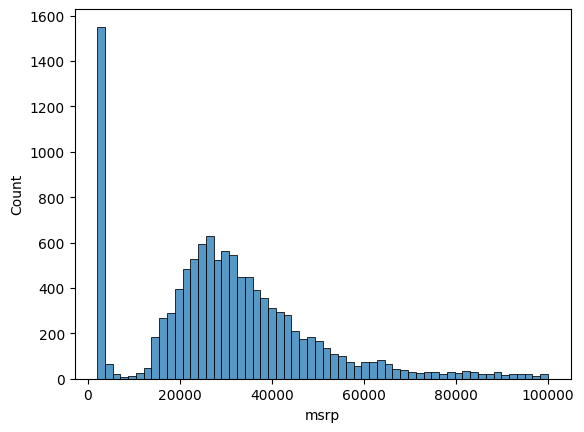

In [40]:
sns.histplot(df.msrp[df.msrp < 1e5])

7. Applying log transformation to prices in order to remove the long tail distribution. This transformation will enable the model to learn better

/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

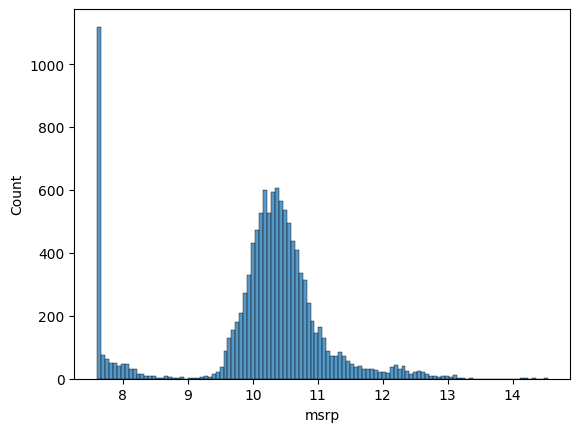

In [41]:
log_price = np.log1p(df.msrp)
sns.histplot(log_price)


8. Checking for missing values

In [42]:
#Verifying that target value do not have null values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

9. Creating a dictionary where the categorical variables are converted to one-hot encoding scheme

In [43]:
"""make_dummies = pd.get_dummies(df.make, prefix="make")
df[make_dummies.columns.to_list()] = make_dummies.astype(int)

model_dummies = pd.get_dummies(df.model, prefix="model")
df[model_dummies.columns.to_list()] = model_dummies.astype(int)

tt_dummies = pd.get_dummies(df.transmission_type, prefix="transmission_type")
df[tt_dummies.columns.to_list()] = tt_dummies.astype(int)

style_dummies = pd.get_dummies(df.vehicle_style, prefix="vehicle_style")
df[style_dummies.columns.to_list()] = style_dummies.astype(int)

size_dummies = pd.get_dummies(df.vehicle_style, prefix="vehicle_style")
df[size_dummies.columns.to_list()] = size_dummies.astype(int)

df = df.select_dtypes(include="number")
df.head()"""

car_dict = df.to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(car_dict)




DictVectorizer(sparse=False)

10. Splitting the dataset into three parts: train (60%), validation (20%) and test (20%).

In [44]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val+n_test)

#The seed is fixed to make sure that the results are reproducible
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

#Shuffling the Dataframe with the help of idx

df_shuffled = df.iloc[idx]

#Splitting the shuffled Dataframe
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = np.log1p(df_train.msrp.values)
y_val =  np.log1p(df_val.msrp.values)
y_test =  np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']



11. Training a linear regression model with normal equation

In [45]:
def prepare_X(df, dv):
    df = df.copy()
    #fill missing values with zero
    df_num = df.fillna(0)
    
    #convert DataFrame to a Numpy array
    X = dv.transform(df_num.to_dict(orient='records'))
    return X


#Linear regression with normal equation with regularization
def train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #normal equation formula
    XTX = X.T.dot(X)
    #regularization
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

#Logistic regression
from sklearn.linear_model import LinearRegression
def train_sklearn_linear_regression (X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

X_train = prepare_X(df_train, dv)

#Linear regression
#w_0, w = train_linear_regression(X_train, y_train, r = 0.001)
#y_predict = w_0 + X_train.dot(w)

#Logistic regression
model = train_sklearn_linear_regression(X_train, y_train)
y_predict = model.predict(X_train)

12. Plot the predictions and compare with the original values

/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorge/opt/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

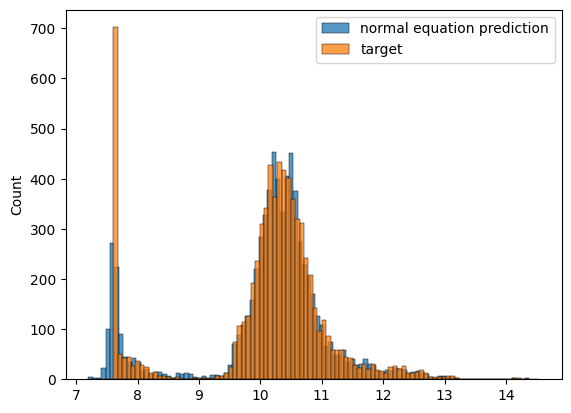

In [46]:
sns.histplot(y_predict, label = 'normal equation prediction')
sns.histplot(y_train, label = 'target')
plt.legend()

13. Evaluate model quality by means RMSE (Root Mean Squared Error)

In [47]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def predict(df, dv, w, w_0):
    X = prepare_X(df, dv)
    y_pred = w_0 + X.dot(w)
    return y_pred

def predict_sklearn(df, dv, model):
    X = prepare_X(df, dv)
    y_pred = model.predict(X)
    return y_pred


print('Training RMSE: ', rmse(y_train, y_predict))


#y_predict = predict(df_val, dv, w, w_0)
y_predict = predict_sklearn(df_val, dv, model)
print('Validation RMSE: ', rmse(y_val, y_predict))

#y_predict = predict(df_test, dv, w, w_0)
y_predict = predict_sklearn(df_test, dv, model)
print('Test RMSE: ', rmse(y_test, y_predict))

#get the real price
#real_price = np.expm1(y_predict)

Training RMSE:  0.14859171760046813
Validation RMSE:  0.19786775412343466
Test RMSE:  0.2184687569840539


14. Using pickle to save the model and the dictVectorizer

In [48]:
import pickle
with open('car-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)
